In [ ]:
import pandas as pd
data=pd.read_csv('/content/train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
from sklearn.feature_selection import SelectKBest
# selectkbest - k best number of features
bestfeatures=SelectKBest()
fit=bestfeatures.fit(x,y)
dfscore=pd.DataFrame(fit.scores_)
dfcloumns=pd.DataFrame(x.columns)
dataframe=pd.concat([dfcloumns,dfscore],axis=1)
dataframe.columns=['spec','score']
# print(dataframe)
print(dataframe.nlargest(10,'score'))

             spec        score
13            ram  3520.110824
0   battery_power    31.598158
12       px_width    22.620882
11      px_height    19.484842
8       mobile_wt     3.594318
6      int_memory     2.922996
9         n_cores     2.625415
14           sc_h     2.225984
15           sc_w     1.671000
16      talk_time     1.628811


In [ ]:
xnew=data[['ram','battery_power','px_width','px_height','mobile_wt','int_memory','n_cores','sc_h','sc_w','talk_time']]
xnew

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,n_cores,sc_h,sc_w,talk_time
0,2549,842,756,20,188,7,2,9,7,19
1,2631,1021,1988,905,136,53,3,17,3,7
2,2603,563,1716,1263,145,41,5,11,2,9
3,2769,615,1786,1216,131,10,6,16,8,11
4,1411,1821,1212,1208,141,44,2,8,2,15
...,...,...,...,...,...,...,...,...,...,...
1995,668,794,1890,1222,106,2,6,13,4,19
1996,2032,1965,1965,915,187,39,4,11,10,16
1997,3057,1911,1632,868,108,36,8,9,1,5
1998,869,1512,670,336,145,46,5,18,10,19


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xnew,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=10)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 0, 3, 2, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 1, 1, 0, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 1, 3, 2, 1,
       0, 2, 3, 2, 1, 1, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 1, 1, 2, 2, 3, 0, 2, 3, 3, 2, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 1, 1, 0, 0, 3, 1, 0, 2, 0, 1, 0, 1, 2, 3, 1, 1,
       0, 2, 1, 0, 3, 1, 3, 1, 3, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 1, 0, 2, 3, 3, 1, 2, 1, 2, 3, 2, 3, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       2, 2, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 2, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 3, 2,

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time
model1=DecisionTreeClassifier()
start=time.time()
model1.fit(x_train,y_train)
stop=time.time()
print('With feature selection : ',stop-start) # training time calculation
y_pred1=model1.predict(x_test)
y_pred1

With feature selection :  0.014404773712158203


array([0, 1, 1, 0, 2, 1, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 3, 1, 2, 1, 1, 2, 0, 3, 3, 1, 0, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 1, 3, 2, 1,
       0, 2, 3, 2, 1, 2, 0, 3, 3, 1, 2, 1, 1, 0, 0, 3, 1, 2, 3, 2, 2, 1,
       1, 1, 3, 0, 1, 1, 1, 3, 3, 0, 3, 3, 3, 3, 1, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 2, 0, 3, 2, 1, 1, 0, 0, 3, 1, 0, 2, 0, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 2, 0, 3, 1, 0, 2, 3, 3, 1, 2, 1, 2, 2, 2, 3, 1, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 3, 0, 1, 0, 3, 1,
       0, 2, 2, 1, 3, 3, 1, 3, 1, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       1, 2, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 2, 2, 3, 0, 1, 1, 2, 3, 1, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 3, 3, 2, 2,

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       135
           1       0.89      0.94      0.92       149
           2       0.88      0.88      0.88       168
           3       0.96      0.89      0.92       148

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



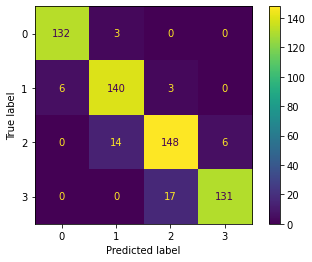

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print('CLASSIFICATION REPORT\n',classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['0','1','2','3']))

[Text(0.5246698943661972, 0.9642857142857143, 'X[0] <= 2235.5\ngini = 0.75\nsamples = 1400\nvalue = [365, 351, 332, 352]'),
 Text(0.23789612676056338, 0.8928571428571429, 'X[0] <= 1082.5\ngini = 0.58\nsamples = 745\nvalue = [365, 308, 72, 0]'),
 Text(0.1415492957746479, 0.8214285714285714, 'X[3] <= 1441.0\ngini = 0.196\nsamples = 327\nvalue = [291, 36, 0, 0]'),
 Text(0.11126760563380282, 0.75, 'X[1] <= 1804.0\ngini = 0.138\nsamples = 309\nvalue = [286, 23, 0, 0]'),
 Text(0.08450704225352113, 0.6785714285714286, 'X[5] <= 63.5\ngini = 0.072\nsamples = 269\nvalue = [259, 10, 0, 0]'),
 Text(0.0647887323943662, 0.6071428571428571, 'X[3] <= 1245.0\ngini = 0.058\nsamples = 266\nvalue = [258, 8, 0, 0]'),
 Text(0.04225352112676056, 0.5357142857142857, 'X[2] <= 1977.0\ngini = 0.039\nsamples = 253\nvalue = [248, 5, 0, 0]'),
 Text(0.030985915492957747, 0.4642857142857143, 'X[0] <= 835.5\ngini = 0.031\nsamples = 250\nvalue = [246, 4, 0, 0]'),
 Text(0.02535211267605634, 0.39285714285714285, 'gini = 

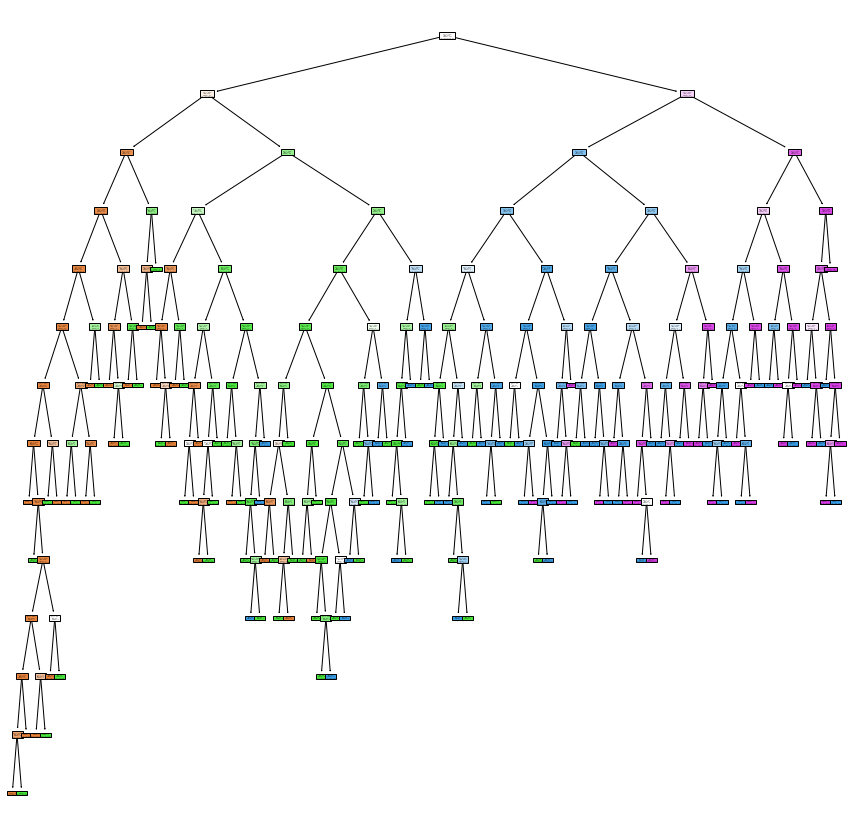

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(model1,filled=True)

In [ ]:
print('CLASSIFICATION REPORT-1\n',classification_report(y_test,y_pred1))

CLASSIFICATION REPORT-1
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       135
           1       0.77      0.89      0.82       149
           2       0.85      0.80      0.83       168
           3       0.92      0.92      0.92       148

    accuracy                           0.86       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.86      0.87       600



In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=.30,random_state=5)

In [ ]:
model2=DecisionTreeClassifier()
start1=time.time()
model2.fit(x_train1,y_train1)
stop1=time.time()
print('Without feature selection : ',stop1-start1)      # training time calclulation
y_pred2=model2.predict(x_test1)
y_pred2

Without feature selection :  0.014208316802978516


array([2, 3, 3, 0, 1, 1, 2, 3, 2, 1, 2, 0, 3, 3, 2, 0, 2, 2, 1, 3, 0, 1,
       3, 2, 3, 2, 2, 3, 0, 1, 1, 2, 0, 0, 3, 2, 0, 3, 3, 0, 3, 1, 3, 2,
       3, 3, 0, 0, 2, 2, 2, 3, 2, 1, 3, 0, 1, 0, 2, 1, 0, 0, 2, 3, 0, 1,
       2, 3, 2, 1, 2, 2, 0, 0, 0, 3, 2, 1, 1, 3, 1, 3, 1, 1, 1, 1, 0, 1,
       2, 1, 3, 0, 2, 3, 2, 2, 1, 2, 3, 3, 3, 1, 1, 0, 3, 2, 1, 2, 0, 3,
       0, 2, 0, 0, 1, 2, 2, 2, 3, 0, 1, 2, 1, 0, 3, 2, 0, 0, 1, 3, 2, 2,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 3, 0, 1, 3, 1, 0, 0, 0, 2, 1, 1, 1, 0,
       2, 2, 2, 0, 0, 3, 3, 3, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2,
       0, 2, 3, 0, 0, 0, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 1, 1, 3, 2, 2, 2,
       0, 1, 2, 0, 3, 0, 2, 3, 3, 2, 1, 0, 1, 3, 1, 3, 2, 1, 2, 1, 1, 2,
       3, 0, 3, 2, 0, 1, 1, 2, 0, 3, 2, 2, 1, 3, 2, 1, 3, 1, 0, 3, 0, 1,
       1, 0, 1, 0, 2, 2, 0, 0, 3, 3, 0, 3, 2, 0, 0, 3, 3, 2, 3, 1, 2, 1,
       0, 2, 3, 3, 3, 3, 0, 1, 1, 2, 2, 0, 3, 1, 3, 3, 2, 0, 1, 1, 1, 3,
       3, 3, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 3, 3, 3,

In [ ]:
print('CLASSIFICATION REPORT 2 ',classification_report(y_test1,y_pred2))

CLASSIFICATION REPORT 2                precision    recall  f1-score   support

           0       0.91      0.89      0.90       152
           1       0.79      0.80      0.80       148
           2       0.76      0.81      0.78       149
           3       0.90      0.85      0.87       151

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600

